In [1]:
import sys
sys.path.append('../src')

from module.linear import Linear
from loss.mse_loss import MSELoss
from networks.linear_network import LinearNetwork

from utils.generation import *
from utils.plots import *

import numpy as np
import matplotlib.pyplot as plt

## Régression Lineaire : 

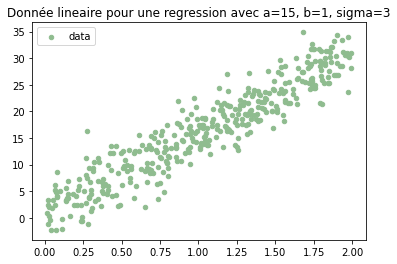

Last Loss : 9.661483566918792


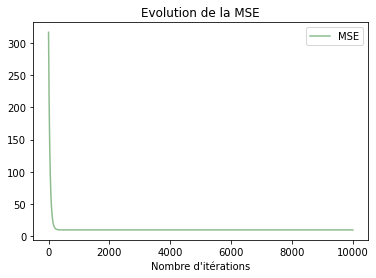

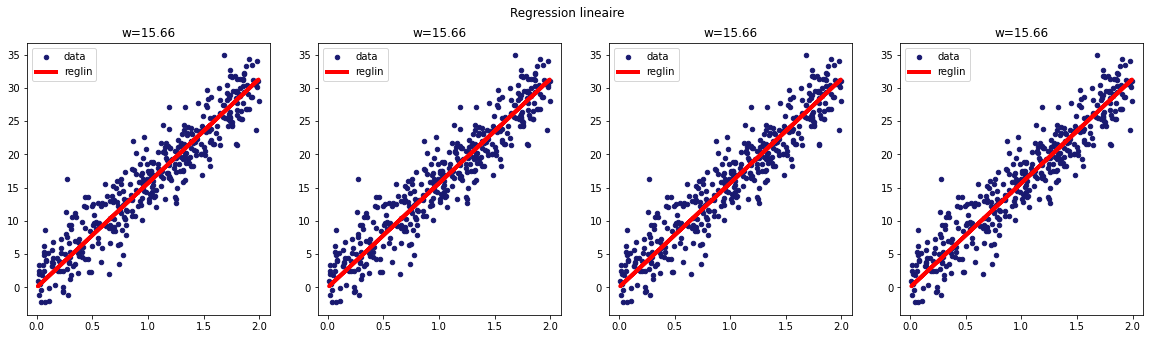

In [2]:
a = 15
b = 1
sigma = 3

data = generate_linear_data(n_samples=400, a=a, b=b, sigma=sigma)
plot_2d(data, f"Donnée lineaire pour une regression avec a={a}, b={b}, sigma={sigma}")

X = data[:, 0]
y = data[:, 1]

net = LinearNetwork(niter=10000, bias=False)
net.fit(X, y)

plot_loss(net, "MSE")
plot_frontiere_reglin(data, [net.linear._parameters[0][0], net.linear._parameters[0][0],  net.linear._parameters[0][0],  net.linear._parameters[0][0]])

In [3]:
# num_samples = 100
# x1 = np.random.randn(num_samples, 2) + np.array([2, 2])
# x2 = np.random.randn(num_samples, 2) + np.array([-2, -2])
# X = np.vstack((x1, x2))
# Y = np.hstack((np.ones(num_samples), -np.ones(num_samples)))

# # Afficher les nuages de points
# plt.scatter(x1[:, 0], x1[:, 1], label='Classe 1')
# plt.scatter(x2[:, 0], x2[:, 1], label='Classe -1')
# plt.legend()
# plt.show()


In [10]:
# X, y = gen_arti(data_type=0)
# y = y.reshape(-1)
# plt.scatter(X[y == 1][:, 0], X[y == 1][:, 1], label='Classe 1')
# plt.scatter(X[y == -1][:, 0], X[y == -1][:, 1], label='Classe -1')
# plt.legend()
# plt.show()

In [52]:
def plot_frontiere_lineaire(X, y, classifier, step=30):
    mmax=X.max(0)
    mmin=X.min(0)
    
    x1grid,x2grid = np.meshgrid(np.linspace(mmin[0],mmax[0],step),np.linspace(mmin[1],mmax[1],step))
    grid = np.hstack((x1grid.reshape(x1grid.size,1),x2grid.reshape(x2grid.size,1)))
    res = classifier.forward(grid)
    res = res.reshape(x1grid.shape)
    
    plt.scatter(X[y == 1][:, 0], X[y == 1][:, 1], label='Classe 1')
    plt.scatter(X[y == -1][:, 0], X[y == -1][:, 1], label='Classe -1')

    plt.contourf(x1grid,x2grid,res,colors=["darksalmon", "skyblue"], levels=[-1000, 0, 1000], alpha=0.5)
    plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


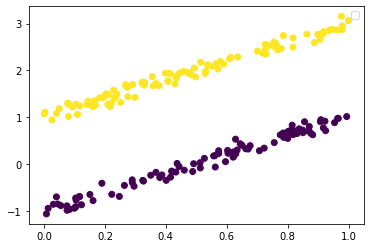

In [58]:
num_samples = 100
# pour la première classe de points, on prend des coordonnées x aléatoires entre 0 et 1 et y = m*x + c
m = 2
c = 1
x1 = np.random.rand(num_samples)
y1 = m * x1 + c + np.random.randn(num_samples) * 0.1
# pour la deuxième classe de points, on prend des coordonnées x aléatoires entre 0 et 1 et y = m*x + c2
c2 = -1
x2 = np.random.rand(num_samples)
y2 = m * x2 + c2 + np.random.randn(num_samples) * 0.1

x1 = np.column_stack((x1, y1))
y1 = np.array([1] * len(y1))

x2 =  np.column_stack((x2, y2))
y2 = np.array([-1] * len(y2))

X = np.concatenate([x1, x2], axis = 0)
y = np.concatenate([y1, y2], axis = 0)

indices = np.arange(len(X))
np.random.shuffle(indices)

X = X[indices]
y = y[indices]

plt.scatter(X[:,0], X[:,1], c=y)
plt.legend()
plt.show()

In [61]:

X, y = gen_arti(data_type=0)
y = y.reshape(-1)

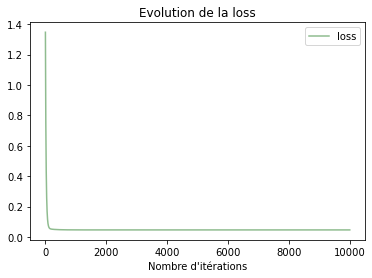

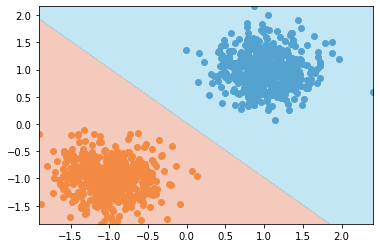

In [62]:


rl = LinearRegression(niter=10000, gradient_step=1e-5, bias=True)
rl.fit(X, y.reshape((-1, 1)))

plt.figure()
plt.title('Evolution de la loss')
plt.plot(rl.train_loss, label='loss', c='darkseagreen')
plt.legend()
plt.xlabel('Nombre d\'itérations')
plt.show()

plot_frontiere_lineaire(X, y, rl.linear,step=100)

In [27]:
import sys
sys.path.append('../src')

from utils.generation import generate_data_gauss, generate_data_outliers, generate_linear_data

In [11]:
X, y = generate_data_gauss(100, [[-1, -1], [2, 2], [4, 4]], [[1, 1], [1, 1], [1, 1]], [-1, 0, 1])

In [12]:
X.shape

(300, 2)

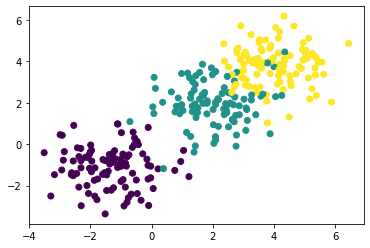

In [13]:
plt.scatter(X[:, 0], X[:, 1], c=y)

In [23]:
X, y = generate_data_outliers(100, 20, [[-1, -1], [2, 2], [4, 4]], [[1, 1], [1, 1], [1, 1]])

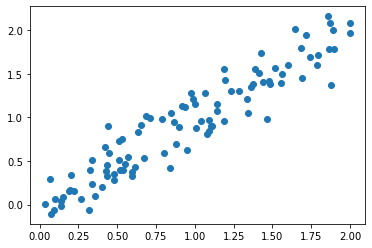

In [29]:
X = generate_linear_data()
plt.scatter(X[:, 0], X[:, 1])